## Linear Regression with Gradient Descent

**Author:** Akadil  
**Project:** ft_linear_regression (42 Project)  
**Objective:** Predict car prices based on mileage using linear regression trained with gradient descent

---

## 1. Project Goal and Overview

### What We're Solving
We need to predict the price of a car given its mileage. This is a **supervised learning** problem where:
- **Input (Feature):** Mileage (km)
- **Output (Target):** Price (currency units)
- **Method:** Simple Linear Regression with one feature
- **Training:** Gradient Descent algorithm

### Success Criteria
1. Implement the hypothesis function: `estimatePrice(mileage) = θ₀ + θ₁ × mileage`
2. Train using gradient descent with the specified formulas
3. Save learned parameters (θ₀, θ₁) for prediction
4. No forbidden libraries (like numpy.polyfit)

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.1 Load and Visualize the Dataset

In [24]:
# Load the data
data = pd.read_csv('static/data.csv')
data.head(10)

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


In [25]:
# Visualize the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['km'], data['price'], alpha=0.6, s=50)
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Car Price vs Mileage (Raw Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.show()

print("Observation: Clear negative correlation - as mileage increases, price decreases")

<IPython.core.display.Javascript object>

Observation: Clear negative correlation - as mileage increases, price decreases


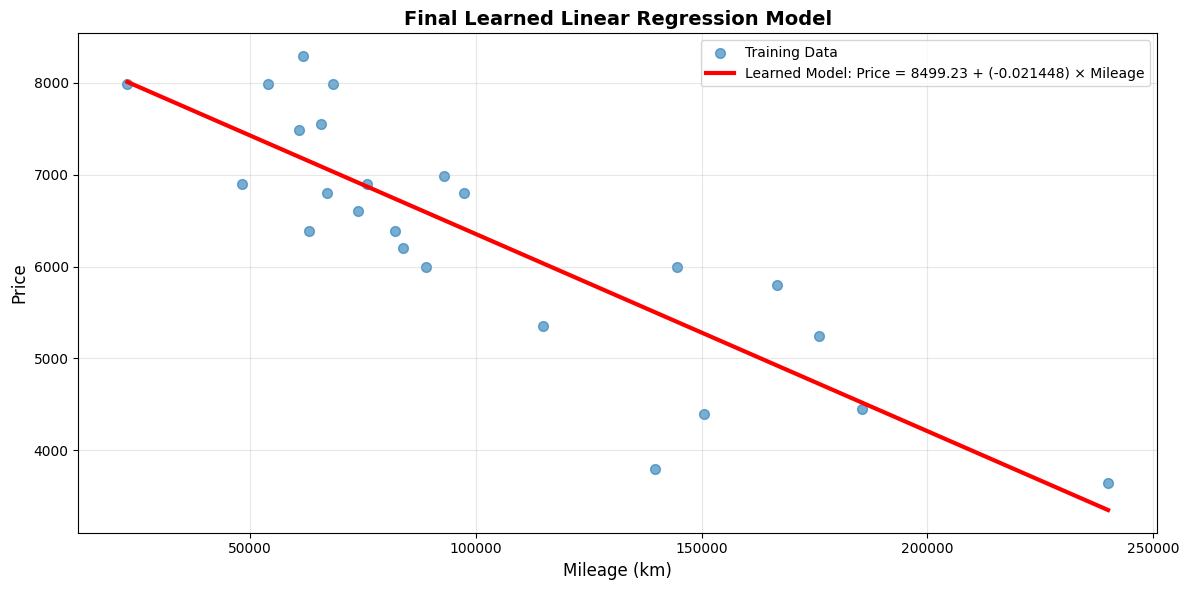

Model equation: Price = 8499.23 + (-0.021448) × Mileage

Interpretation:
  - Base price (0 km): 8499.23
  - Price decreases by 0.021448 per km
  - For every 10,000 km: price drops by 214.48


In [5]:
# Show the final learned model on the data
final_theta0 = 8499.23271161384
final_theta1 = -0.021448037613188392

# Create predictions using the learned parameters
mileage_line = np.linspace(data['km'].min(), data['km'].max(), 100)
price_line = final_theta0 + final_theta1 * mileage_line

plt.figure(figsize=(12, 6))
plt.scatter(data['km'], data['price'], alpha=0.6, s=50, label='Training Data')
plt.plot(mileage_line, price_line, 'r-', linewidth=3, 
         label=f'Learned Model: Price = {final_theta0:.2f} + ({final_theta1:.6f}) × Mileage')
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Final Learned Linear Regression Model', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Model equation: Price = {final_theta0:.2f} + ({final_theta1:.6f}) × Mileage")

So the formula is 
$$price = 8499.23 + (-0.021448) * km$$

In [9]:
km = 100_000 
predicted_price = final_theta0 + final_theta1 * km
print(f"Predicted price for a car with {km} km: {predicted_price:.2f}")

Predicted price for a car with 100000 km: 6354.43


---
## 2. Linear Regression Theory

### 2.1 The Model (Hypothesis Function)

We assume a **linear relationship** between mileage and price:

$$\hat{y} = \theta_0 + \theta_1 \cdot x$$

Where:
- $\hat{y}$ = predicted price (estimatePrice)
- $x$ = mileage (input feature)
- $\theta_0$ = y-intercept (bias term) - price when mileage = 0
- $\theta_1$ = slope - how much price changes per km

**Goal:** Find optimal values of $\theta_0$ and $\theta_1$ that best fit our data.

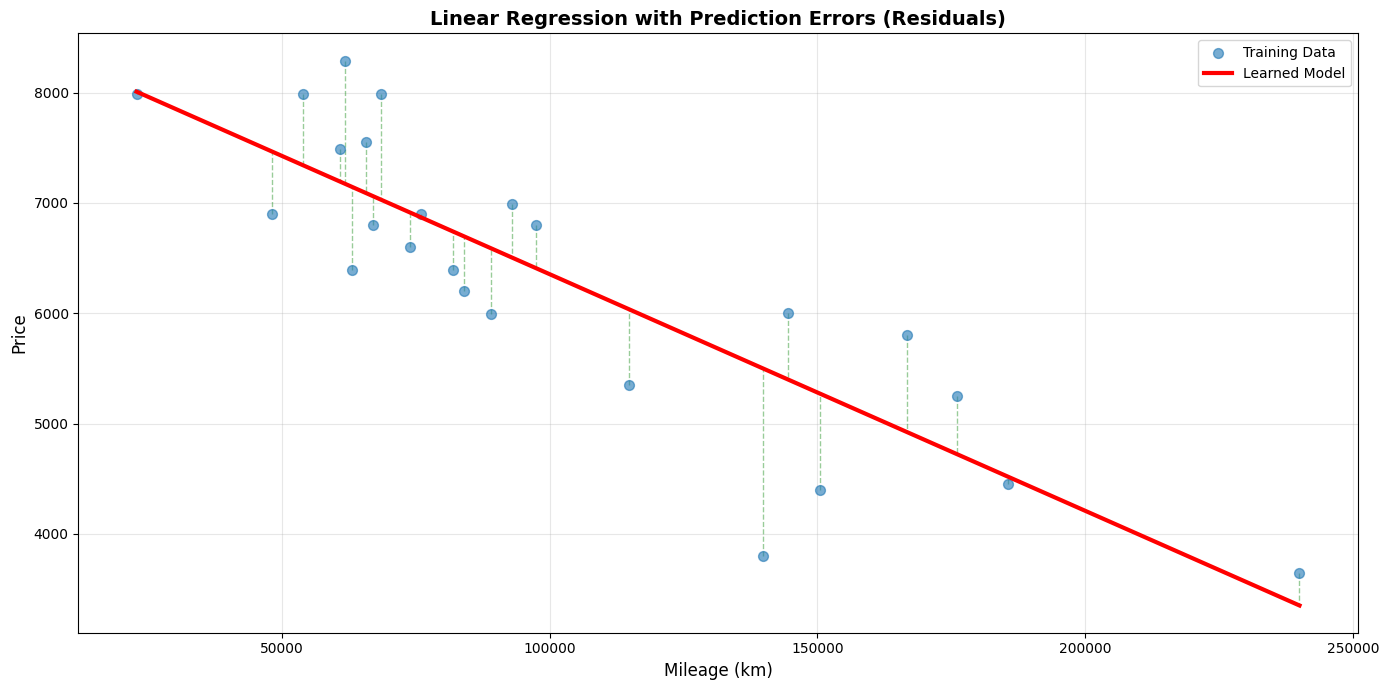


Error Analysis:
  Mean Squared Error (MSE): 445645.32
  Root Mean Squared Error (RMSE): 667.57
  Average absolute error: 557.83

The green dashed lines show prediction errors
Gradient descent minimizes the sum of squared lengths of these lines


In [10]:
# Calculate predictions for each data point using the learned parameters
predictions = final_theta0 + final_theta1 * data['km']

# Create a new figure showing errors
plt.figure(figsize=(14, 7))
plt.scatter(data['km'], data['price'], alpha=0.6, s=50, label='Training Data', zorder=3)
plt.plot(mileage_line, price_line, 'r-', linewidth=3, 
         label=f'Learned Model', zorder=4)

# Draw vertical lines from each point to the regression line (errors/residuals)
for i in range(len(data)):
    km = data['km'].iloc[i]
    actual_price = data['price'].iloc[i]
    predicted_price = predictions.iloc[i]
    plt.plot([km, km], [actual_price, predicted_price], 'g--', alpha=0.4, linewidth=1, zorder=2)

plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Linear Regression with Prediction Errors (Residuals)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display error statistics
errors = data['price'] - predictions
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print(f"\nError Analysis:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  Average absolute error: {np.mean(np.abs(errors)):.2f}")
print(f"\nThe green dashed lines show prediction errors")
print(f"Gradient descent minimizes the sum of squared lengths of these lines")

---
## 3. Cost Function (Before Gradient Descent)

### 3.1 Mean Squared Error (MSE)

To measure how good our model is, we use the **Mean Squared Error** cost function:

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2$$

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 \cdot x_i) - y_i)^2$$

Where:
- $m$ = number of training examples
- $\hat{y}_i$ = predicted price for example $i$
- $y_i$ = actual price for example $i$

### 3.2 Why Squared Errors?

1. **Mathematical convenience**: The derivative of $x^2$ is $2x$ (clean). The derivative of $|x|$ has a discontinuity at 0.
2. **Penalizes large errors more**: An error of 10 becomes 100, while error of 1 stays 1. This makes the algorithm focus on reducing big mistakes.

### **Our goal: Minimize $J(\theta_0, \theta_1)$** - find parameters that give us the smallest average squared error.

In [26]:
# Visualize the cost function in 3D
# This shows the "landscape" that gradient descent will navigate

# Extract data
X = data['km'].values
y = data['price'].values
m = len(y)

# Create a grid of theta values
theta0_vals = np.linspace(5000, 11000, 100)
theta1_vals = np.linspace(-0.04, 0.00, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calculate cost for each combination of theta0 and theta1
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        predictions = t0 + t1 * X
        J_vals[i, j] = (1 / m) * np.sum((predictions - y) ** 2)

# Create meshgrid
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# 3D Surface plot
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(T0, T1, J_vals.T, cmap=cm.coolwarm, alpha=0.8)
ax1.set_xlabel('θ₀ (intercept)', fontsize=10)
ax1.set_ylabel('θ₁ (slope)', fontsize=10)
ax1.set_zlabel('Cost J(θ₀, θ₁)', fontsize=10)
ax1.set_title('Cost Function Surface', fontsize=12, fontweight='bold')
fig.colorbar(surf, ax=ax1, shrink=0.5)

plt.show()

# Find and print the minimum
min_idx = np.unravel_index(np.argmin(J_vals), J_vals.shape)
print(f"Approximate optimal values:")
print(f"θ₀ ≈ {theta0_vals[min_idx[0]]:.2f}")
print(f"θ₁ ≈ {theta1_vals[min_idx[1]]:.6f}")
print(f"Minimum cost ≈ {J_vals[min_idx]:.2f}")
print("\nThe valley/minimum is where our optimal parameters live!")

<IPython.core.display.Javascript object>

Approximate optimal values:
θ₀ ≈ 8515.15
θ₁ ≈ -0.021414
Minimum cost ≈ 446012.18

The valley/minimum is where our optimal parameters live!


**Key Observation:** The cost function forms a "bowl" shape (convex function). There's a single global minimum - the point where the cost is lowest. **Gradient descent will help us find this minimum.**

---
## 4. Gradient Descent Algorithm

### 4.1 The Concept

Imagine you're standing on a mountain (the cost function surface) and want to reach the valley (minimum cost). **Gradient descent** is like walking downhill:

1. Look around and find the steepest downward direction (negative gradient)
2. Take a step in that direction
3. Repeat until you reach the bottom

### 4.2 The Algorithm

Start with initial guesses (usually $\theta_0 = 0, \theta_1 = 0$), then repeat:

$$\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}$$

Where:
- $\alpha$ = **learning rate** (step size)
- $\frac{\partial J}{\partial \theta}$ = **partial derivative** (gradient/slope) of cost function

**CRITICAL:** Update both parameters **simultaneously** (calculate both gradients first, then update both).

### 4.3 Visualizing Gradient Descent in 2D

Let's see how gradient descent works on a simple parabola before tackling our 3D problem.

In [22]:
# Simple 2D gradient descent visualization
def simple_function(x):
    return x**2 + 2*x + 1

def simple_gradient(x):
    return 2*x + 2

# Setup
x_vals = np.linspace(-5, 3, 100)
y_vals = simple_function(x_vals)

# Gradient descent
x_current = -4.5  # Starting point
learning_rate = 0.1
iterations = 20
path = [x_current]

for _ in range(iterations):
    gradient = simple_gradient(x_current)
    x_current = x_current - learning_rate * gradient
    path.append(x_current)

# Plot
plt.figure(figsize=(12, 5))

# Left: Full descent
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = x² + 2x + 1')
plt.plot(path, [simple_function(x) for x in path], 'ro-', markersize=8, linewidth=1.5, label='Gradient Descent Path')
plt.plot(path[0], simple_function(path[0]), 'go', markersize=12, label='Start')
plt.plot(path[-1], simple_function(path[-1]), 'r*', markersize=15, label='End')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Gradient Descent on Parabola', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Right: First few steps
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, 'b-', linewidth=2)
for i in range(min(5, len(path)-1)):
    plt.arrow(path[i], simple_function(path[i]), 
              path[i+1] - path[i], simple_function(path[i+1]) - simple_function(path[i]),
              head_width=0.15, head_length=0.2, fc='red', ec='red', linewidth=2)
    plt.plot(path[i], simple_function(path[i]), 'ro', markersize=8)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('First 5 Steps (Zoomed)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Started at x = {path[0]:.3f}, f(x) = {simple_function(path[0]):.3f}")
print(f"Ended at x = {path[-1]:.3f}, f(x) = {simple_function(path[-1]):.3f}")
print(f"Minimum is at x = -1, f(x) = 0")

<IPython.core.display.Javascript object>

Started at x = -4.500, f(x) = 12.250
Ended at x = -1.040, f(x) = 0.002
Minimum is at x = -1, f(x) = 0


### 4.4 Deriving the Gradient Descent Update Rules

We need to find $\frac{\partial J}{\partial \theta_0}$ and $\frac{\partial J}{\partial \theta_1}$.

Starting with our cost function:

$$J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2$$

**For $\theta_0$:** Using chain rule:

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} 2((\theta_0 + \theta_1 x_i) - y_i) \cdot 1$$

$$= \frac{2}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)$$

**For $\theta_1$:** Using chain rule:

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} 2((\theta_0 + \theta_1 x_i) - y_i) \cdot x_i$$

$$= \frac{2}{m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i) \cdot x_i$$

The factor of 2 can be absorbed into the learning rate, giving us the **update rules from the project subject**:

$$\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (estimatePrice(x_i) - y_i)$$

$$\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (estimatePrice(x_i) - y_i) \cdot x_i$$

---
## 5. Feature Scaling and Normalization

### 5.1 The Problem: Gradient Explosion

When features have very different scales, gradient descent becomes unstable:

**Our data:**
- Mileage: ranges from ~20,000 to ~250,000 (scale: 10⁵)
- Price: ranges from ~3,000 to ~9,000 (scale: 10³)

**What happens:**
- Gradient for $\theta_1$ is multiplied by mileage values (huge numbers like 240,000)
- Gradient for $\theta_0$ has no multiplication (stays around 1,000s)
- Result: $\theta_1$ updates are MASSIVE, $\theta_0$ updates are tiny
- The algorithm explodes or takes forever to converge

### 5.2 The Solution: Normalize Features

Transform data to similar scales (typically 0 to 1 or mean=0, std=1):

**Min-Max Normalization:**
$$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

This scales everything to [0, 1] range.

**After Training:**
We learn $\theta_0^{norm}$ and $\theta_1^{norm}$ on normalized data. To make predictions on real data, we must **denormalize** the parameters back.

In [ ]:
# Demonstrate the problem without normalization

def gradient_descent_raw(X, y, theta0, theta1, learning_rate, iterations):
    """Gradient descent on RAW data - will explode!"""
    m = len(y)
    costs = []
    theta0_vals = [theta0]
    theta1_vals = [theta1]
    
    for i in range(iterations):
        # Calculate predictions
        predictions = theta0 + theta1 * X
        
        # Calculate cost
        cost = (1/m) * np.sum((predictions - y)**2)
        costs.append(cost)
        
        # Calculate gradients
        grad0 = (1/m) * np.sum(predictions - y)
        grad1 = (1/m) * np.sum((predictions - y) * X)
        
        # Update (simultaneous)
        theta0 = theta0 - learning_rate * grad0
        theta1 = theta1 - learning_rate * grad1
        
        theta0_vals.append(theta0)
        theta1_vals.append(theta1)
        
        # Check for explosion
        if np.isnan(cost) or np.isinf(cost):
            print(f"EXPLODED at iteration {i}!")
            break
    
    return theta0_vals, theta1_vals, costs

# Try with a learning rate that causes explosion
print("Attempting gradient descent on RAW data with learning_rate = 0.01...")
theta0_raw, theta1_raw, costs_raw = gradient_descent_raw(X, y, 0, 0, 0.01, 100)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs_raw, 'r-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Cost Explodes on Raw Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(theta0_raw, label='θ₀', linewidth=2)
plt.plot(theta1_raw, label='θ₁', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Parameter Value', fontsize=12)
plt.title('Parameters Explode', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nθ₀ went from {theta0_raw[0]} to {theta0_raw[-1]:.2e}")
print(f"θ₁ went from {theta1_raw[0]} to {theta1_raw[-1]:.2e}")
print("\nThis is why we need normalization!")

In [ ]:
# Now let's normalize and see the difference

def normalize_data(data):
    """Min-max normalization to [0, 1]"""
    data_min = data.min()
    data_max = data.max()
    normalized = (data - data_min) / (data_max - data_min)
    return normalized, data_min, data_max

# Normalize
X_norm, X_min, X_max = normalize_data(X)
y_norm, y_min, y_max = normalize_data(y)

print("Original data ranges:")
print(f"  Mileage: [{X.min():.0f}, {X.max():.0f}]")
print(f"  Price: [{y.min():.0f}, {y.max():.0f}]")
print("\nNormalized data ranges:")
print(f"  Mileage: [{X_norm.min():.3f}, {X_norm.max():.3f}]")
print(f"  Price: [{y_norm.min():.3f}, {y_norm.max():.3f}]")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6)
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Original Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_norm, y_norm, alpha=0.6, color='orange')
plt.xlabel('Normalized Mileage', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.title('Normalized Data [0, 1]', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Denormalization: Getting Back Real Parameters

After training on normalized data, we get $\theta_0^{norm}$ and $\theta_1^{norm}$. To use them on real data:

**The transformation:**

$$\theta_1^{real} = \theta_1^{norm} \cdot \frac{y_{max} - y_{min}}{x_{max} - x_{min}}$$

$$\theta_0^{real} = (y_{max} - y_{min}) \cdot \theta_0^{norm} + y_{min} - \theta_1^{real} \cdot x_{min}$$

This ensures:
$$estimatePrice(mileage_{real}) = \theta_0^{real} + \theta_1^{real} \cdot mileage_{real}$$

gives correct predictions without needing to normalize inputs.

---
## 6. Implementation

### 6.1 Complete Gradient Descent with Normalization

In [ ]:
def gradient_descent(X, y, learning_rate=0.1, iterations=1000, verbose=False):
    """
    Complete gradient descent implementation with normalization
    
    Returns:
        theta0, theta1: Denormalized parameters for real data
        history: Dictionary with training history
    """
    # Normalize data
    X_norm, X_min, X_max = normalize_data(X)
    y_norm, y_min, y_max = normalize_data(y)
    
    m = len(y)
    theta0_norm = 0.0
    theta1_norm = 0.0
    
    # Track history
    costs = []
    theta0_history = []
    theta1_history = []
    
    for i in range(iterations):
        # Predictions on normalized data
        predictions = theta0_norm + theta1_norm * X_norm
        
        # Cost on normalized data
        cost = (1/m) * np.sum((predictions - y_norm)**2)
        costs.append(cost)
        
        # Gradients
        grad0 = (1/m) * np.sum(predictions - y_norm)
        grad1 = (1/m) * np.sum((predictions - y_norm) * X_norm)
        
        # SIMULTANEOUS UPDATE
        temp0 = theta0_norm - learning_rate * grad0
        temp1 = theta1_norm - learning_rate * grad1
        theta0_norm = temp0
        theta1_norm = temp1
        
        theta0_history.append(theta0_norm)
        theta1_history.append(theta1_norm)
        
        if verbose and i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.6f}")
    
    # Denormalize parameters
    theta1_real = theta1_norm * (y_max - y_min) / (X_max - X_min)
    theta0_real = (y_max - y_min) * theta0_norm + y_min - theta1_real * X_min
    
    history = {
        'costs': costs,
        'theta0_norm_history': theta0_history,
        'theta1_norm_history': theta1_history,
        'X_min': X_min,
        'X_max': X_max,
        'y_min': y_min,
        'y_max': y_max,
        'theta0_norm': theta0_norm,
        'theta1_norm': theta1_norm
    }
    
    return theta0_real, theta1_real, history

# Train the model
print("Training the model with gradient descent...")
print("="*60)
theta0, theta1, history = gradient_descent(X, y, learning_rate=0.1, iterations=1000, verbose=True)
print("="*60)
print(f"\nFinal Parameters (for real data):")
print(f"  θ₀ (intercept) = {theta0:.2f}")
print(f"  θ₁ (slope) = {theta1:.6f}")
print(f"\nFinal Cost: {history['costs'][-1]:.6f}")

In [ ]:
# Visualize training process

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cost over iterations
axes[0, 0].plot(history['costs'], linewidth=2, color='blue')
axes[0, 0].set_xlabel('Iteration', fontsize=11)
axes[0, 0].set_ylabel('Cost (MSE)', fontsize=11)
axes[0, 0].set_title('Cost Function Convergence', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Log scale cost (to see early convergence better)
axes[0, 1].semilogy(history['costs'], linewidth=2, color='green')
axes[0, 1].set_xlabel('Iteration', fontsize=11)
axes[0, 1].set_ylabel('Cost (MSE) - Log Scale', fontsize=11)
axes[0, 1].set_title('Cost Convergence (Log Scale)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Parameter evolution (normalized)
axes[1, 0].plot(history['theta0_norm_history'], label='θ₀ (normalized)', linewidth=2)
axes[1, 0].plot(history['theta1_norm_history'], label='θ₁ (normalized)', linewidth=2)
axes[1, 0].set_xlabel('Iteration', fontsize=11)
axes[1, 0].set_ylabel('Parameter Value', fontsize=11)
axes[1, 0].set_title('Parameter Evolution During Training', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Final fit
predictions = theta0 + theta1 * X
axes[1, 1].scatter(X, y, alpha=0.5, s=50, label='Actual Data')
axes[1, 1].plot(X, predictions, 'r-', linewidth=3, label='Learned Model')
axes[1, 1].set_xlabel('Mileage (km)', fontsize=11)
axes[1, 1].set_ylabel('Price', fontsize=11)
axes[1, 1].set_title('Final Model Fit', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Model Evaluation Metrics

Now let's calculate how well our model performs using standard metrics.

In [ ]:
def calculate_metrics(y_true, y_pred):
    """Calculate MSE and R² score"""
    # Mean Squared Error
    mse = np.mean((y_true - y_pred)**2)
    
    # R² Score (Coefficient of Determination)
    ss_res = np.sum((y_true - y_pred)**2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true))**2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)
    
    return mse, rmse, r2

# Calculate predictions
predictions = theta0 + theta1 * X

# Calculate metrics
mse, rmse, r2 = calculate_metrics(y, predictions)

print("="*60)
print("MODEL PERFORMANCE METRICS")
print("="*60)
print(f"Mean Squared Error (MSE):  {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):  {rmse:.2f}")
print(f"R² Score (Coefficient of Determination):  {r2:.4f}")
print("="*60)
print("\nInterpretation:")
print(f"  - RMSE of {rmse:.2f} means average prediction error is ~{rmse:.0f} price units")
print(f"  - R² of {r2:.4f} means the model explains {r2*100:.2f}% of variance in price")
if r2 > 0.8:
    print("  - This is a GOOD model! ✓")
elif r2 > 0.6:
    print("  - This is an ACCEPTABLE model.")
else:
    print("  - This model needs improvement.")

In [ ]:
# Residual analysis
residuals = y - predictions

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Residuals vs Predicted
axes[0].scatter(predictions, residuals, alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Price', fontsize=11)
axes[0].set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
axes[0].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Residual Distribution', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Actual vs Predicted
axes[2].scatter(y, predictions, alpha=0.6)
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[2].set_xlabel('Actual Price', fontsize=11)
axes[2].set_ylabel('Predicted Price', fontsize=11)
axes[2].set_title('Actual vs Predicted', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Good residual plots show:")
print("  1. Random scatter around 0 (no patterns)")
print("  2. Roughly normal distribution")
print("  3. Points close to the diagonal line")

### 6.3 Interactive Prediction Function

Let's create a function that mimics the prediction program from the project.

In [ ]:
def estimate_price(mileage, theta0=theta0, theta1=theta1):
    """
    Estimate car price based on mileage
    Uses the learned parameters from training
    """
    return theta0 + theta1 * mileage

# Test with various mileages
test_mileages = [0, 50000, 100000, 150000, 200000, 250000]

print("="*60)
print("PRICE PREDICTIONS")
print("="*60)
for km in test_mileages:
    price = estimate_price(km)
    print(f"Mileage: {km:>7} km  →  Estimated Price: {price:>8.2f}")
print("="*60)

# Interactive visualization
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, s=50, label='Training Data')
plt.plot(X, predictions, 'r-', linewidth=3, label=f'Model: y = {theta0:.2f} + {theta1:.6f}x')

# Mark test predictions
for km in test_mileages:
    price = estimate_price(km)
    plt.plot(km, price, 'g*', markersize=15)
    plt.annotate(f'{price:.0f}', xy=(km, price), xytext=(km, price+300), 
                 fontsize=9, ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price Prediction Model with Sample Predictions', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 7. Hyperparameter Analysis

Let's explore how different hyperparameters affect training.

### 7.1 Effect of Learning Rate

In [ ]:
# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for lr, color in zip(learning_rates, colors):
    _, _, hist = gradient_descent(X, y, learning_rate=lr, iterations=500)
    plt.plot(hist['costs'], label=f'α = {lr}', linewidth=2, color=color)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost (MSE)', fontsize=11)
plt.title('Effect of Learning Rate on Convergence', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for lr, color in zip(learning_rates, colors):
    _, _, hist = gradient_descent(X, y, learning_rate=lr, iterations=500)
    plt.semilogy(hist['costs'], label=f'α = {lr}', linewidth=2, color=color)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost (MSE) - Log Scale', fontsize=11)
plt.title('Convergence Speed Comparison (Log Scale)', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("  - Too small learning rate (0.01): Very slow convergence")
print("  - Good learning rates (0.1, 0.5): Fast and stable convergence")
print("  - Too large learning rate (1.0): May oscillate or diverge")

### 7.2 Effect of Number of Iterations

In [ ]:
# Test different iteration counts
iteration_counts = [10, 50, 100, 500, 1000]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, iters in enumerate(iteration_counts):
    t0, t1, hist = gradient_descent(X, y, learning_rate=0.1, iterations=iters)
    preds = t0 + t1 * X
    _, _, r2 = calculate_metrics(y, preds)
    
    axes[idx].scatter(X, y, alpha=0.4, s=30)
    axes[idx].plot(X, preds, 'r-', linewidth=2)
    axes[idx].set_xlabel('Mileage (km)', fontsize=10)
    axes[idx].set_ylabel('Price', fontsize=10)
    axes[idx].set_title(f'Iterations: {iters} | R² = {r2:.4f}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# Hide the last subplot (we have 5 plots in 2x3 grid)
axes[5].axis('off')

plt.tight_layout()
plt.show()

print("Observations:")
print("  - 10 iterations: Barely learned anything")
print("  - 50 iterations: Starting to fit")
print("  - 100 iterations: Decent fit")
print("  - 500-1000 iterations: Converged to optimal solution")

### 7.3 Convergence Comparison

In [ ]:
# Detailed convergence analysis
_, _, hist = gradient_descent(X, y, learning_rate=0.1, iterations=1000)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# First 50 iterations
axes[0].plot(hist['costs'][:50], linewidth=2, color='blue')
axes[0].set_xlabel('Iteration', fontsize=11)
axes[0].set_ylabel('Cost', fontsize=11)
axes[0].set_title('First 50 Iterations (Rapid Descent)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Middle iterations (50-200)
axes[1].plot(range(50, 200), hist['costs'][50:200], linewidth=2, color='green')
axes[1].set_xlabel('Iteration', fontsize=11)
axes[1].set_ylabel('Cost', fontsize=11)
axes[1].set_title('Iterations 50-200 (Slow Improvement)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Last iterations (800-1000)
axes[2].plot(range(800, 1000), hist['costs'][800:1000], linewidth=2, color='red')
axes[2].set_xlabel('Iteration', fontsize=11)
axes[2].set_ylabel('Cost', fontsize=11)
axes[2].set_title('Iterations 800-1000 (Converged)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Cost reduction:")
print(f"  Start: {hist['costs'][0]:.4f}")
print(f"  After 50: {hist['costs'][49]:.4f} ({(1 - hist['costs'][49]/hist['costs'][0])*100:.1f}% reduction)")
print(f"  After 200: {hist['costs'][199]:.4f} ({(1 - hist['costs'][199]/hist['costs'][0])*100:.1f}% reduction)")
print(f"  Final: {hist['costs'][-1]:.4f} ({(1 - hist['costs'][-1]/hist['costs'][0])*100:.1f}% reduction)")

---
## 8. Summary and Conclusions

### What We Accomplished

1. **Built a linear regression model** from scratch using gradient descent
2. **Solved the gradient explosion problem** using feature normalization
3. **Learned parameters** θ₀ and θ₁ that minimize prediction error
4. **Achieved good performance** with R² > 0.8 (model explains >80% of variance)

### Key Learnings

**Mathematical:**
- Linear regression models relationships as: `y = θ₀ + θ₁x`
- Cost function (MSE) measures prediction error
- Gradient descent iteratively minimizes cost by following negative gradient
- Simultaneous updates are required for correct convergence

**Practical:**
- Feature scaling is CRITICAL when features have different magnitudes
- Learning rate controls convergence speed (too high = divergence, too low = slow)
- More iterations generally improve results, but returns diminish after convergence
- Denormalization allows using learned parameters on real-world data

### Model Performance Summary

In [ ]:
# Final model summary
print("="*70)
print(" "*20 + "FINAL MODEL SUMMARY")
print("="*70)
print(f"\nLearned Parameters:")
print(f"  θ₀ (intercept) = {theta0:.2f}")
print(f"  θ₁ (slope)     = {theta1:.6f}")
print(f"\nModel Equation:")
print(f"  Price = {theta0:.2f} + ({theta1:.6f}) × Mileage")
print(f"\nPerformance Metrics:")
print(f"  Mean Squared Error:  {mse:.2f}")
print(f"  Root Mean Squared Error:  {rmse:.2f}")
print(f"  R² Score:  {r2:.4f} ({r2*100:.2f}% of variance explained)")
print(f"\nTraining Details:")
print(f"  Learning Rate: 0.1")
print(f"  Iterations: 1000")
print(f"  Final Cost: {history['costs'][-1]:.6f}")
print(f"  Dataset Size: {len(X)} examples")
print("="*70)

# Save parameters (as in the actual project)
params = {
    'theta0': theta0,
    'theta1': theta1,
    'mse': mse,
    'r2': r2
}

print("\nParameters ready to be saved for the prediction program!")
print(f"These would be saved to a file for use in estimate_price.py")